# load packages and data

In [1]:
%reset -f

import pandas            as pd
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns
import numpy             as np

from datetime                    import datetime
from statsmodels.tsa.stattools   import adfuller
from statsmodels.tsa.arima.model import ARIMA

# set up seaborn parameters for plotting

In [68]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

# load data into Python

In [69]:
df = pd.read_excel('AuQuGDP.xlsx')

In [70]:
df.head()

,Time,AuGDP
0,1960-01-01,6.468300e+10
1,1960-04-01,6.647300e+10
2,1960-07-01,6.662300e+10
3,1960-10-01,6.649000e+10
4,1961-01-01,6.669000e+10


# set time index

In [71]:
df['date'] = pd.to_datetime(df['Time'])
df = df.set_index('date')
df.drop(['Time'], axis=1, inplace=True)
df.head()

,AuGDP
date,
1960-01-01,6.468300e+10
1960-04-01,6.647300e+10
1960-07-01,6.662300e+10
1960-10-01,6.649000e+10
1961-01-01,6.669000e+10


In [72]:
df.tail(6)

,AuGDP
date,
2018-10-01,4.701400e+11
2019-01-01,4.722670e+11
2019-04-01,4.751560e+11
2019-07-01,4.777910e+11
2019-10-01,4.802800e+11
2020-01-01,4.788110e+11


# line plot of AuGDP

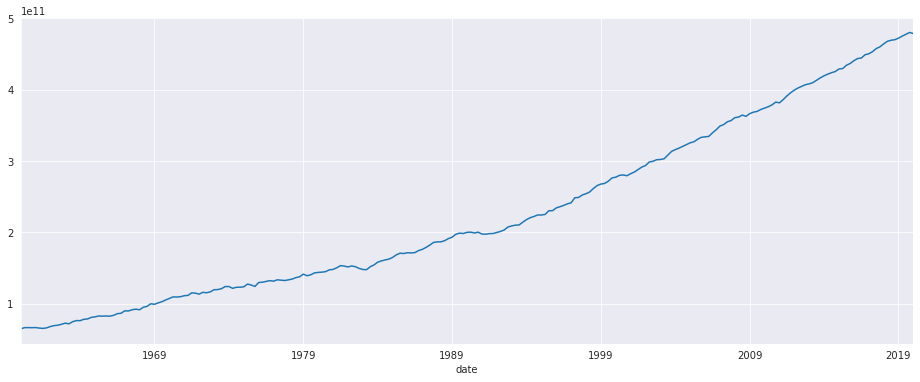

In [73]:
df['AuGDP'].plot()
plt.show()

# autocorrelation and partial correlation plot of AuGDP

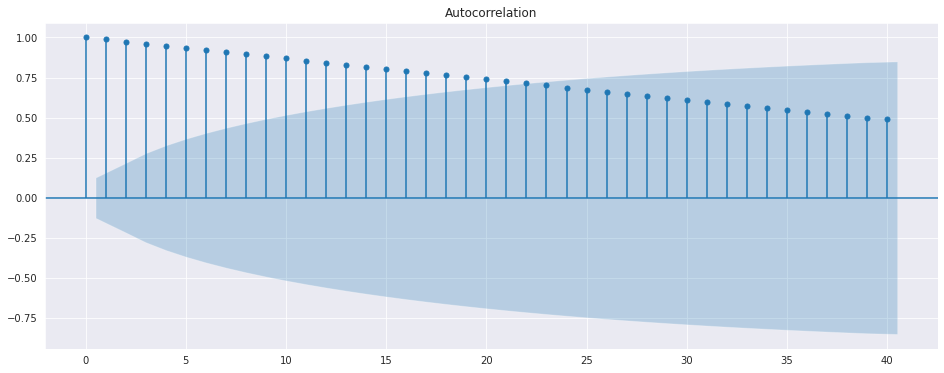

In [74]:
sm.graphics.tsa.plot_acf(df['AuGDP'].values.squeeze(), lags=40)
plt.show()

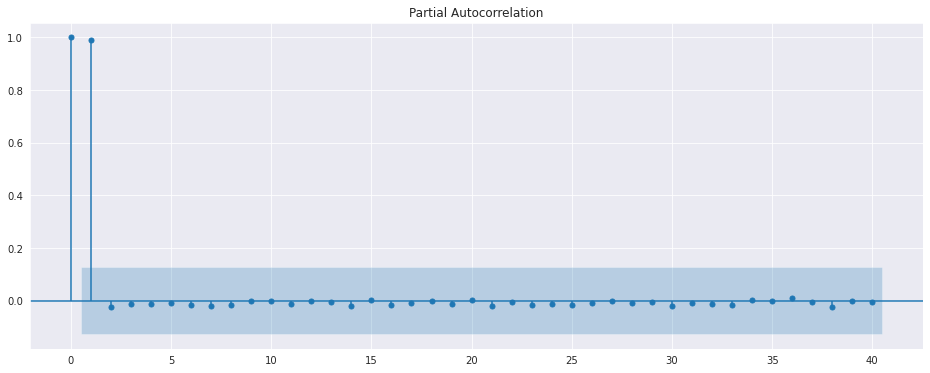

In [75]:
sm.graphics.tsa.plot_pacf(df['AuGDP'].values.squeeze(), lags=40)
plt.show()

# first order differencing AuGDP and the corresponding line/autocorrelation/partial correlation plot

In [76]:
df2 = df
df2['GDP_D1'] = df2['AuGDP'].diff()
df2 = df2.dropna(axis = 0)

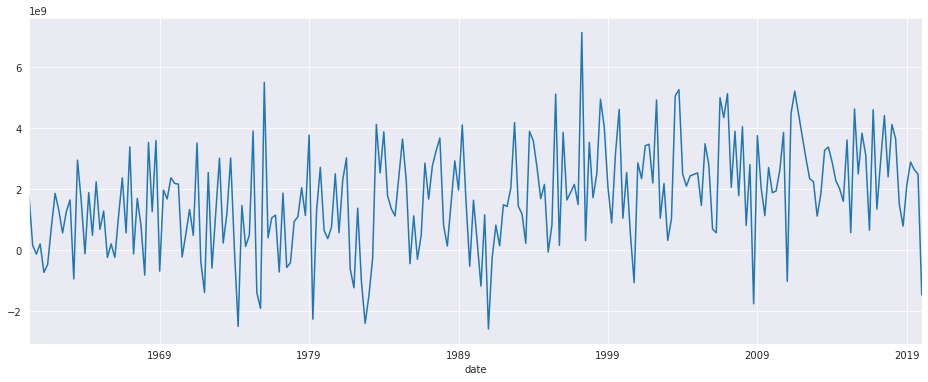

In [77]:
df2['GDP_D1'].plot()
plt.show()

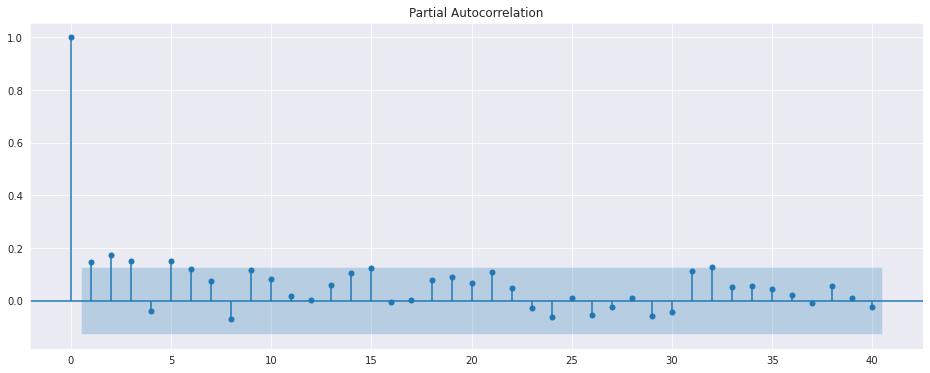

In [78]:
sm.graphics.tsa.plot_pacf(df2['GDP_D1'].values.squeeze(), lags=40)
plt.show()

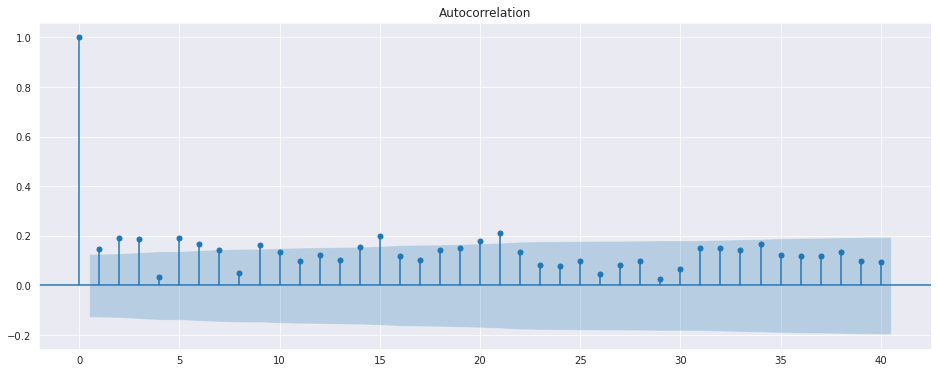

In [79]:
sm.graphics.tsa.plot_acf(df2['GDP_D1'].values.squeeze(), lags=40)
plt.show()

# adf tests for AuGDP and GDP_D1

In [80]:
X = df2['AuGDP'].values
result1=adfuller(X,regression='ct',maxlag=3,regresults=True,store=True)
#result=adfuller(X,regression='ct',autolag='BIC',regresults=True,store=True)
out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'
print(out.format(result1[0], result1[1], result1[2]))

 ADF statistic: -0.433, 
 p-value: 0.986, 
 critical value: {'1%': -3.99715658668426, '5%': -3.4290213886201637, '10%': -3.137938763154836}


In [81]:
X2 = df2['GDP_D1'].values
result2=adfuller(X2,regression='ct',maxlag=3,regresults=True,store=True)
#result=adfuller(X,regression='ct',autolag='BIC',regresults=True,store=True)
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -15.258, 
 p-value: 0.000, 
 critical value: {'1%': -3.99715658668426, '5%': -3.4290213886201637, '10%': -3.137938763154836}


# AR(5), the corresponding diagnostics and forcast

In [86]:
mod = ARIMA(df2['GDP_D1'][df2.index.year<=2018], order=(5,0,0))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                 GDP_D1   No. Observations:                  235
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -5319.911
Date:                Mon, 21 Sep 2020   AIC                          10653.822
Time:                        04:20:12   BIC                          10678.040
Sample:                    04-01-1960   HQIC                         10663.586
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.725e+09   6.08e-12   2.84e+20      0.000    1.73e+09    1.73e+09
ar.L1          0.1059      0.060      1.767      0.077      -0.012       0.223
ar.L2          0.1458      0.066      2.194      0.0

/home/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/home/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/home/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


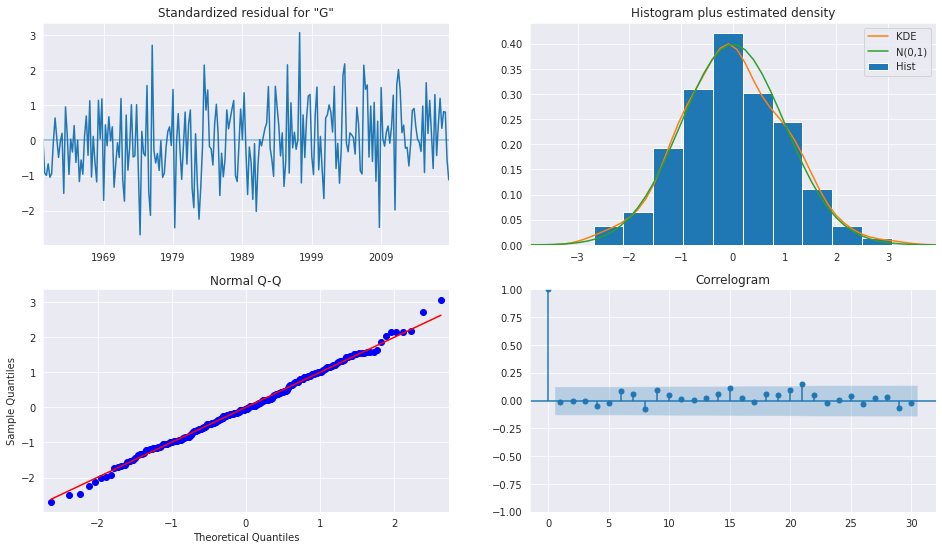

In [87]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [88]:
res.forecast(steps=1)

2019-01-01    1.811564e+09
Freq: QS-OCT, dtype: float64

In [89]:
res.forecast(steps=4)

2019-01-01    1.811564e+09
2019-04-01    1.782159e+09
2019-07-01    1.891437e+09
2019-10-01    1.782372e+09
Freq: QS-OCT, Name: predicted_mean, dtype: float64

# MA(6), the corresponding diagnostics and forcast

In [90]:
mod = ARIMA(df2['GDP_D1'][df2.index.year<=2018], order=(0, 0, 6))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                 GDP_D1   No. Observations:                  235
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -5319.038
Date:                Mon, 21 Sep 2020   AIC                          10654.076
Time:                        04:21:01   BIC                          10681.753
Sample:                    04-01-1960   HQIC                         10665.234
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.725e+09   6.68e-12   2.58e+20      0.000    1.73e+09    1.73e+09
ma.L1          0.0879      0.067      1.308      0.191      -0.044       0.220
ma.L2          0.1718      0.072      2.390      0.0

/home/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/home/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/home/ning/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


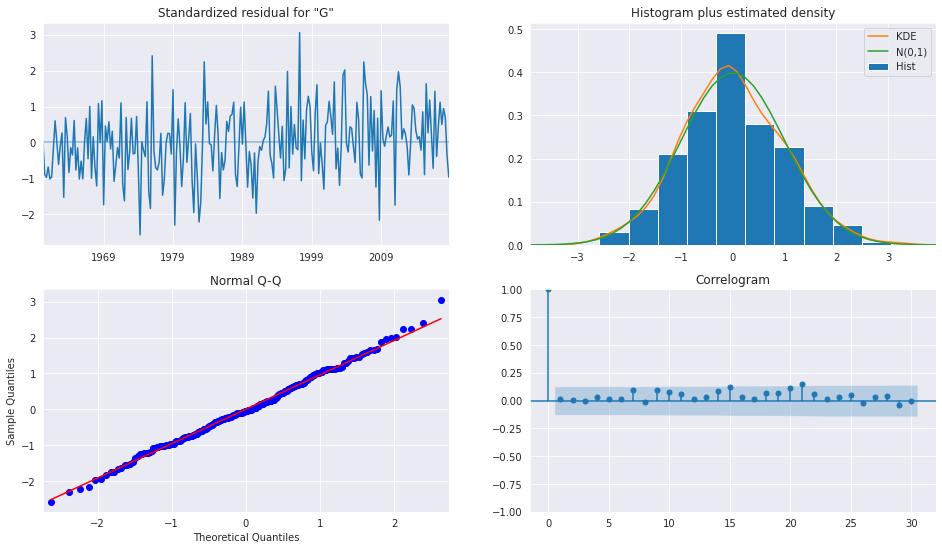

In [91]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [92]:
res.forecast(steps=1)

2019-01-01    1.884415e+09
Freq: QS-OCT, dtype: float64

In [93]:
res.forecast(steps=4)

2019-01-01    1.884415e+09
2019-04-01    1.559540e+09
2019-07-01    1.864562e+09
2019-10-01    1.937100e+09
Freq: QS-OCT, Name: predicted_mean, dtype: float64